## Importing the Libraries

In [1]:
import numpy as np # To create n dimensional arrays
import pandas as pd # To read and create a dataframe for the dataset
import matplotlib.pyplot as plt # To plot the graphs.

## Getting the Dataset

In [2]:
# Reading the file
dataset = pd.read_csv('startup_funding.csv', skipinitialspace = True, encoding = 'UTF-8')
df = dataset.copy() # Just a another dataframe, so that we can get back to our original dataframe if required

## Taking care of the Discrepancies

In [3]:
# replace function is used to replace data values with another in dataframe, inplace is used to make changes in 
# the original or not
df.CityLocation.replace('bangalore', 'Bangalore', inplace = True) 
df.CityLocation.replace('Delhi', 'New Delhi', inplace = True)

## Solution for the Problem

In [11]:
# Gathering all the cities from the dataset and putting into the numpy array
city_data = np.array(df.CityLocation) 
cities = []
for c in city_data:
    if c != np.nan: # some rows in dataset are empty
        # City in city_data may contain more than one city hence using split() function to seperate it out
        x = str(c).split('/')
        # Each string may contain an extra space character in the end or at beginning and hence that character
        # not required
        for k in x:
            if k[0] == ' ':
                k = k[1:]
            if k[-1] == ' ':
                k = k[:-1]
            cities.append(k)
cities = np.array(cities) # Numpy array of all cities
# Getting frequency of (City given above) string occured in cities
bn = len(np.where(cities == 'Bangalore')[0])
mum = len(np.where(cities == 'Mumbai')[0])
# Since NCR consist of three Cities :- New Delhi, Gurgaom, Noida
# We need to take care of all of them
ncr = len(np.where((cities == 'New Delhi')|(cities == 'Gurgaon')|(cities == 'Noida'))[0])

## Plotting the Graph

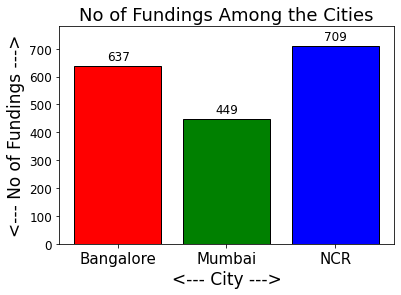

In [5]:
cities = ['Bangalore', 'Mumbai', 'NCR']
values = [bn,mum,ncr]
plt.bar(cities, values, color = ['Red', 'Green', 'Blue'], edgecolor = 'black')
plt.xlabel('<--- City --->', fontsize = 17)
plt.ylabel('<--- No of Fundings --->', fontsize = 17)
plt.ylim(0, 780) # ylim is used to describe the limited of y-axis.
plt.yticks(fontsize = 12)
plt.xticks(rotation = 0, fontsize = 15)
for i in range(len(cities)):
    plt.text(i-0.1, values[i]+20, values[i], fontsize = 12)
plt.title('No of Fundings Among the Cities', fontsize = 18)
plt.show()